In [56]:
#imports
import numpy as np
from numpy.linalg import norm
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statistics import *
from sklearn.model_selection import train_test_split

#create data frame
smoke_df = pd.read_csv('./smoke.csv') 
smoke_df

#check for missing values
smoke_df.isna().sum()



Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [57]:
#scaling dataframe using mean and standard deviation
scale = StandardScaler()
scale.fit(smoke_df)


#scaling dataframe using minmax scaler
# min_max_scaler = MinMaxScaler()
# min_max_scaler.fit(smoke_df)
# smoke_df

#dropping UTC , Sno. column and CNT column
smoke_df.drop(smoke_df.columns[[0,1,14]], axis=1, inplace=True)

#dividing into X and y
X = smoke_df.drop(columns=['Fire Alarm']).values
y_label = smoke_df['Fire Alarm'].values


In [58]:
smoke_df


,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


In [59]:
#split data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size=0.2,random_state=3)


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

k_vals = range(1, 30)
k_scores = []

for k in k_vals:
    knn_sk = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_sk, Xtrain, ytrain, cv=15, scoring='accuracy')
    k_scores.append(score.mean())


print(k_scores)

[0.9997338803529546, 0.9997117024864653, 0.9996229983959213, 0.9996895246199762, 0.9996673541288997, 0.9996673467534869, 0.9995786426629428, 0.9996229983959213, 0.9994899311969857, 0.9994899311969857, 0.9994234049729308, 0.9994012271064416, 0.9993125156404847, 0.9993125156404847, 0.9992903377739956, 0.9992903377739956, 0.9992459820410171, 0.9992459820410171, 0.9992459820410171, 0.9992459820410171, 0.9992459820410171, 0.9992459820410171, 0.9992459820410171, 0.9992459820410171, 0.9992459820410171, 0.9992459820410171, 0.9992459820410171, 0.9992238041745279, 0.9992238041745279]


Text(0, 0.5, '15 Cross Fold Validation Accuracy Score')

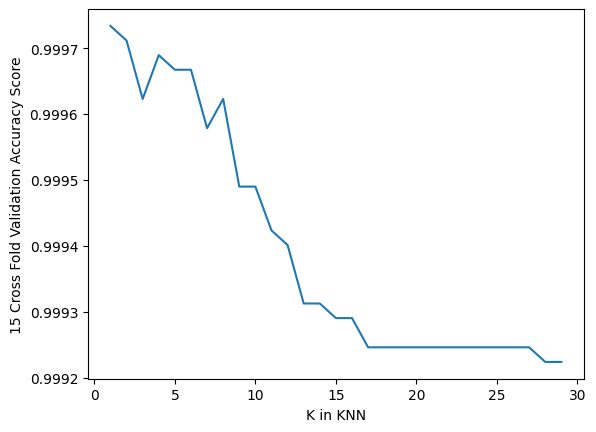

In [10]:
import matplotlib.pyplot as plt
plt.plot(k_vals, k_scores)
plt.xlabel('K in KNN')
plt.ylabel('15 Cross Fold Validation Accuracy Score')

dropping some features

In [11]:
smoke_df

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


In [12]:

#dropping eCO2, Raw Ethanol, PM and NC
smoke_df.drop(smoke_df.columns[[3,5,7,8,9,10,11]], axis=1, inplace=True)

#dividing into X and y
X = smoke_df.drop(columns=['Fire Alarm']).values
y_label = smoke_df['Fire Alarm'].values


In [13]:
#splitting data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size=0.2,random_state=3)


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

k_vals = range(1, 30)
k_scores = []

for k in k_vals:
    knn_sk = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_sk, Xtrain, ytrain, cv=20, scoring='accuracy')
    k_scores.append(score.mean())


print(k_scores)

[0.9980839438441551, 0.9975850214973085, 0.9970261711214443, 0.9966868895887394, 0.9963874963560508, 0.9959684222934815, 0.9958885580793717, 0.9956889891406334, 0.995609148821272, 0.9954295319974577, 0.9952299311990543, 0.9949505378707869, 0.9948308012864933, 0.9947509530022159, 0.994691072762695, 0.9946312243828386, 0.9945713441433176, 0.9943318550448982, 0.9943118790352257, 0.9940524298569662, 0.9939127092980838, 0.993573419800463, 0.9935534597206228, 0.9932141702230017, 0.9931343219387244, 0.9928349366709519, 0.992854888785876, 0.9926353438374648, 0.9923758627995406]


Text(0, 0.5, '15 Cross Fold Validation Accuracy Score')

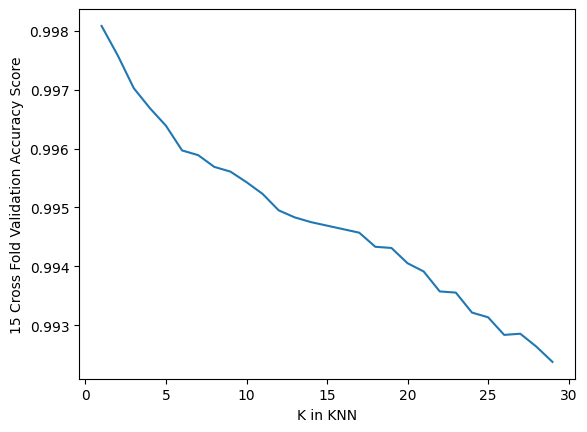

In [16]:
plt.plot(k_vals, k_scores)
plt.xlabel('K in KNN')
plt.ylabel('15 Cross Fold Validation Accuracy Score')

In [18]:
def eucledian_distance(x1,x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

def knn(x_train, y_train , x_input, k):
    prediction = []     

    for i in x_input: 
        distance = []
        for j in range(len(x_train)): 
            dist = eucledian_distance(np.array(x_train[j,:]) , i) 
            distance.append(dist) 
        distance = np.array(distance) 

        k_distance = np.argsort(distance)[:k] 
         
        labels = y_train[k_distance]
         
        y_prediction = mode(labels) 
        prediction.append(y_prediction)
 
    return prediction

In [19]:
ypred = knn(Xtrain, ytrain, Xtest,13)
confusion_matrix= confusion_matrix(ytest,ypred)

array([[3558,   28],
       [  28, 8912]])

In [24]:
accuracy_score(ytest, ypred)
confusion_matrix= confusion_matrix(ytest,ypred)


In [21]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3586
           1       1.00      1.00      1.00      8940

    accuracy                           1.00     12526
   macro avg       0.99      0.99      0.99     12526
weighted avg       1.00      1.00      1.00     12526



Confusion Matrix is
 [[3558   28]
 [  28 8912]]


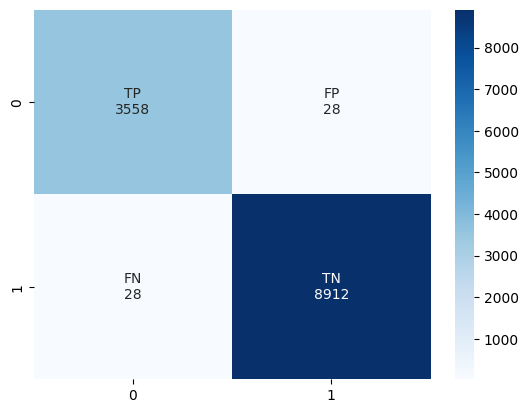

In [25]:
import matplotlib.pyplot as plt
import seaborn as sb

group_names = ['TP','FP','FN','TN']
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

print('Confusion Matrix is\n', confusion_matrix)

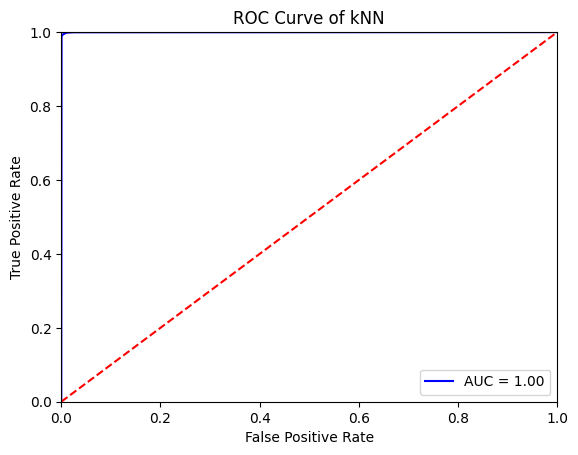

In [27]:
#roc curves

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

knn_scikit = KNeighborsClassifier(n_neighbors=13)
knn_scikit.fit(Xtrain, ytrain)
y_scores = knn_scikit.predict_proba(Xtest)
fpr, tpr, threshold = roc_curve(ytest, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.02f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [30]:
smoke_df

,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Pressure[hPa],Fire Alarm
0,20.000,57.36,0,12306,939.735,0
1,20.015,56.67,0,12345,939.744,0
2,20.029,55.96,0,12374,939.738,0
3,20.044,55.28,0,12390,939.736,0
4,20.059,54.69,0,12403,939.744,0
...,...,...,...,...,...,...
62625,18.438,15.79,625,13723,936.670,0
62626,18.653,15.87,612,13731,936.678,0
62627,18.867,15.84,627,13725,936.687,0
62628,19.083,16.04,638,13712,936.680,0


In [32]:
#making sample size of 6000 data points

smoke_copy = smoke_df

smoke_df_pos = (smoke_copy.loc[smoke_copy['Fire Alarm'] == 1]).head(3000)
smoke_df_neg = (smoke_copy.loc[smoke_copy['Fire Alarm'] == 0]).head(3000)

smoke_subsample = pd.concat([smoke_df_pos,smoke_df_neg],ignore_index=True, sort=False)

In [33]:
smoke_subsample

,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Pressure[hPa],Fire Alarm
0,9.381,56.86,11,13347,939.575,1
1,9.368,58.60,0,13385,939.574,1
2,9.356,60.38,0,13388,938.858,1
3,9.343,62.22,0,13443,939.044,1
4,9.331,63.11,0,13457,939.193,1
...,...,...,...,...,...,...
5995,11.660,51.32,181,13143,939.649,0
5996,11.648,51.35,178,13147,939.653,0
5997,11.635,51.45,187,13142,939.651,0
5998,11.623,51.53,180,13143,939.658,0


In [36]:
X_sample = smoke_subsample.drop(columns=['Fire Alarm']).values
y_sample = smoke_subsample['Fire Alarm'].values

In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_sample, y_sample, test_size=0.2,random_state=3)


In [38]:
print("Xtrain.shape",Xtrain.shape)
print("ytrain.shape",ytrain.shape)
print("Xtest.shape",Xtest.shape)
print("ytest.shape",ytest.shape)

Xtrain.shape (4800, 5)
ytrain.shape (4800,)
Xtest.shape (1200, 5)
ytest.shape (1200,)


In [54]:
ypred = knn(Xtrain, ytrain, Xtest,6)
accuracy_score(ytest, ypred)


1.0

In [55]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(Xtrain, ytrain)

y_pred = logreg.predict(Xtest)
cnf_matrix = metrics.confusion_matrix(ytest, y_pred)
cnf_matrix

array([[592,   0],
       [  0, 608]])

In [43]:
knn_subsample = KNeighborsClassifier(n_neighbors= 4)
knn_subsample.fit(Xtrain, ytrain)
y_pred = knn_subsample.predict(Xtest)

In [44]:
from sklearn import metrics
print("Accuracy of model is - ",metrics.accuracy_score(ytest, y_pred))


Accuracy of model is -  1.0


In [9]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

knn_cv = KNeighborsClassifier(n_neighbors=4)
cv_scores = cross_val_score(knn_cv, Xtrain, ytrain, cv=10)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.99960088 0.99980044 0.99980044 0.99940132 0.9996008  1.
 0.9998004  0.9996008  0.9996008  1.        ]
cv_scores mean:0.9997205867650052


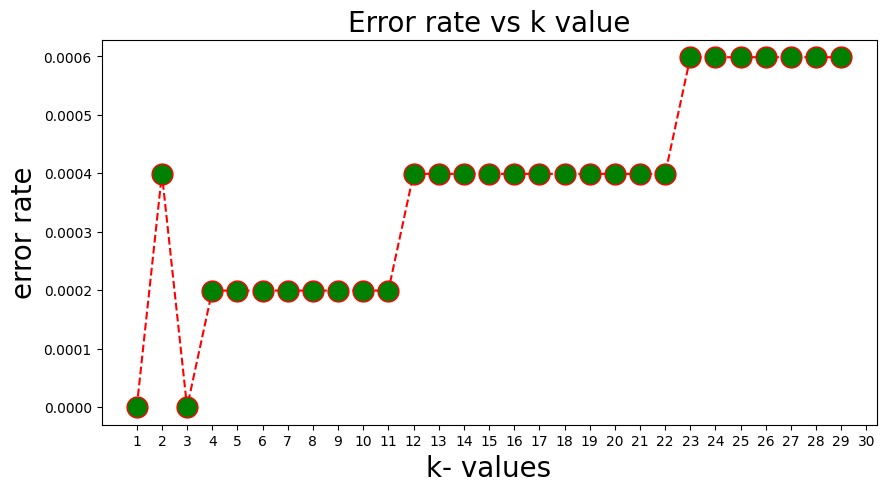

In [34]:
error_rate=[]
for i in range (1,30):  
    knn_i=KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(Xtrain,ytrain)
    y_predict_i=knn_i.predict(Xvalidation)
    error_rate.append(np.mean(y_predict_i != yvalidation))


plt.figure(figsize=(10,5))
plt.plot(range(1,30),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,31))
plt.show()


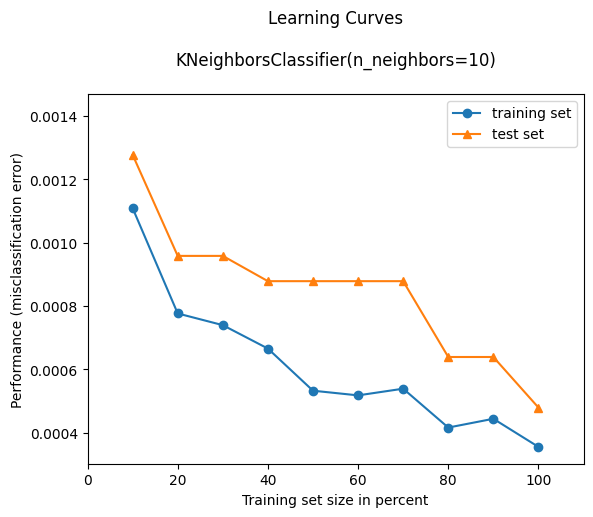

In [35]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(Xtrain, ytrain, Xtest, ytest, knn_scikit)
plt.show()


In [60]:
smoke_df

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


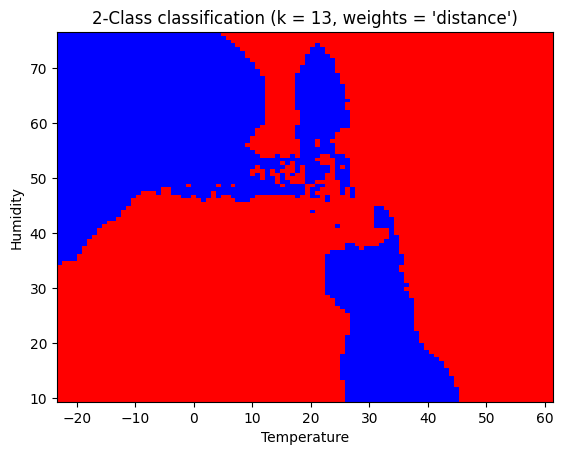

In [80]:
#decision boundary

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 13

smoke_df_2 = smoke_df

#temperature and humidity
X = smoke_df_2[smoke_df_2.columns[0:2]].values
y = smoke_df_2['Fire Alarm'].values

# Create color maps
cmap_light = ListedColormap(["red", "yellow", "blue"])
cmap_bold = ["darkorange", "c", "darkblue"]
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel="Temperature",
        ylabel="Humidity",
        shading="auto",
    )

plt.title(
        "2-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

In [ ]:
#bagging



In [ ]:
#importance of features



